In [1]:
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
import cmath
n_rays=10000
raytrace_dir='/Users/jashcraft/Desktop/prt-data/Ray_trace_10000/'

In [2]:
#ray_1=pd.read_csv(raytrace_dir+"Ray_"+str(1)+".txt",header=None,skiprows=22,delim_whitespace=True,names=["Surface","X-cor","Y-cor","Z-cor","ref-x","ref-y","ref-z","nor-x","nor-y","nor-z","Inc-ang","Pathlength","Surface-name","Surface-type",])
#ray_1791=pd.read_csv(raytrace_dir+"Ray_"+str(1791)+".txt",header=None,skiprows=22,delim_whitespace=True,names=["Surface","X-cor","Y-cor","Z-cor","ref-x","ref-y","ref-z","nor-x","nor-y","nor-z","Inc-ang","Pathlength","Surface-name","Surface-type",])
#ray_statM1=ray_1.iloc[5][0]+ray_1.iloc[5][1]+ray_1.iloc[5][2]+ray_1.iloc[5][3]+ray_1.iloc[5][4]
#ray_statM2=ray_1791.iloc[9][0]+ray_1791.iloc[9][1]+ray_1791.iloc[9][2]+ray_1791.iloc[9][3]+ray_1791.iloc[9][4]

In [4]:
coating=pd.read_csv('coating_gmt.csv',header=0)
coating['n_metal']=coating['n']+1j*coating['k']
print(coating)
wav=input("Input the index corresponding to wavlength:")
nb=coating['n_metal'][int(wav)]
coating = np.loadtxt('coating_gmt.csv',skiprows=1,delimiter=',')
thb=0.04
thf=0
ni=1 # refractive index of air
i = 1
# fn = raytrace_dir+"ray_"+str(i)+".txt"
# print(fn)
# #fn = '/Users/jashcraft/Desktop/stp-testbed/testbed_gutray.txt'
# ray_data = np.genfromtxt(fn,skip_header=22,usecols=(1,2,3,4,5,6),encoding='UTF-16')
# ray_data = np.loadtxt(fn,skiprows=21,encoding='UTF-16',delimiter='\t')
# # columns are wlen [:,0], index [:,1], extinction [:,2]

       Wav      n      k       n_metal
0   0.4000  0.490  -4.86  0.490-4.860j
1   0.4500  0.618  -5.47  0.618-5.470j
2   0.5000  0.769  -6.08  0.769-6.080j
3   0.5500  0.958  -6.69  0.958-6.690j
4   0.6000  1.200  -7.26  1.200-7.260j
5   0.6500  1.470  -7.79  1.470-7.790j
6   0.7000  1.830  -8.31  1.830-8.310j
7   0.7293  2.140  -8.57  2.140-8.570j
8   0.7500  2.400  -8.62  2.400-8.620j
9   0.7749  2.630  -8.60  2.630-8.600j
10  0.7999  2.800  -8.45  2.800-8.450j
11  0.8250  2.750  -8.31  2.750-8.310j
12  0.8266  2.740  -8.31  2.740-8.310j
13  0.8500  2.610  -8.22  2.610-8.220j
14  0.8551  2.580  -8.21  2.580-8.210j
15  0.8750  2.380  -8.18  2.380-8.180j
16  0.8856  2.240  -8.21  2.240-8.210j
17  0.9000  2.060  -8.30  2.060-8.300j
18  0.9184  1.860  -8.44  1.860-8.440j
19  0.9250  1.770  -8.49  1.770-8.490j
20  0.9500  1.490  -8.88  1.490-8.880j
21  1.0000  1.350  -9.58  1.350-9.580j
22  1.2000  1.210 -12.00   1.21-12.00j
23  2.0000  2.150 -20.70   2.15-20.70j
24  3.0000  4.240 -30.60 

Input the index corresponding to wavlength: 2


In [6]:
M1_coord_list=[]
M1_raytrace_list=[]
M1_vignetted_list=[]
M1_inc_dc_list=[]
M1_nor_dc_list=[]
M1_inc_ang_list=[]
M1_ref_dc_list=[]
M1_ref_ang_list=[]
M1_s_in_list=[]
M1_s_out_list=[]
M1_p_in_list=[]
M1_p_out_list=[]

M2_coord_list=[]
M2_raytrace_list=[]
M2_vignetted_list=[]
M2_inc_dc_list=[]
M2_nor_dc_list=[]
M2_inc_ang_list=[]
M2_ref_dc_list=[]
M2_ref_ang_list=[]
M2_s_in_list=[]
M2_s_out_list=[]
M2_p_in_list=[]
M2_p_out_list=[]

rp_M1_list=[]
rs_M1_list=[]
rp_M2_list=[]
rs_M2_list=[]

for i in range(1,n_rays+1):
    ray_data=pd.read_csv(raytrace_dir+"Ray_"+str(i)+".txt",header=None,skiprows=22,delim_whitespace=True,names=["Surface","X-cor","Y-cor","Z-cor","inc-x","inc-y","inc-z","nor-x","nor-y","nor-z","Inc-ang","Pathlength","Surface-name","Surface-type"])
    ray_statM1=ray_data.iloc[5][0]+ray_data.iloc[5][1]+ray_data.iloc[5][2]+ray_data.iloc[5][3]+ray_data.iloc[5][4]
    ray_statM2=ray_data.iloc[9][0]+ray_data.iloc[9][1]+ray_data.iloc[9][2]+ray_data.iloc[9][3]+ray_data.iloc[9][4]
    m1=ray_data.iloc[4]
    M1_coord=(float(m1[0]),float(m1[1]),float(m1[2]))
    if str(ray_statM1) == 'Rayterminated,missedsurface5.' or str(ray_statM2) == 'Rayterminated,missedsurface7.':
        print("Ray is vignetted at"+str(M1_coord))
        M1_ref_dc=(0,0,0)
        M1_nor_dc=(0,0,0)
        M1_inc_dc=(0,0,0)
        M1_inc_ang=0
        M2_ref_dc=(0,0,0)
        M2_nor_dc=(0,0,0)
        M2_inc_dc=(0,0,0)
        M2_inc_ang=0
        rp_M1=0
        rs_M1=0
        rp_M2=0
        rs_M2=0
        
    else:
        print("Ray is not vignetted at"+str(M1_coord))
        
        M1_ref_dc=np.multiply((float(m1[3]),float(m1[4]),float(m1[5])),-1)
        M1_nor_dc=(float(m1[6]),float(m1[7]),float(m1[8]))
        M1_inc_ang=np.radians(float(m1[9]))
        
        M1_in_ang=np.multiply(2,np.dot(M1_ref_dc,M1_nor_dc))
        M1_inc_dc=M1_ref_dc-np.multiply(M1_in_ang,M1_nor_dc)
        M1_inc_dc=np.multiply(M1_inc_dc,-1)
        
        ang_refr=np.arcsin((np.sin(M1_inc_ang)*ni)/nb)
        rp_M1=(ni*np.cos(M1_inc_ang)-nb*np.cos(ang_refr))/(ni*np.cos(M1_inc_ang)+nb*np.cos(ang_refr))
        rs_M1=(ni*np.cos(ang_refr)-nb*np.cos(M1_inc_ang))/(ni*np.cos(ang_refr)+nb*np.cos(M1_inc_ang))
        
        
        m2=ray_data.iloc[8]
        M2_coord=(float(m2[0]),float(m2[1]),float(m2[2]))
        
        
        M2_ref_dc=np.multiply((float(m2[3]),float(m2[4]),float(m2[5])),-1)
        M2_nor_dc=(float(m2[6]),float(m2[7]),float(m2[8]))
        M2_inc_ang=np.radians(float(m2[9]))
        
        M2_in_ang=np.multiply(2,np.dot(M2_ref_dc,M2_nor_dc))
        M2_inc_dc=M2_ref_dc-np.multiply(M2_in_ang,M2_nor_dc)
        M2_inc_dc=np.multiply(M2_inc_dc,-1)
        
        ang_refr_M2=np.arcsin((np.sin(M2_inc_ang)*ni)/nb)
        rp_M2=(ni*np.cos(M2_inc_ang)-nb*np.cos(ang_refr_M2))/(ni*np.cos(M2_inc_ang)+nb*np.cos(ang_refr_M2))
        rs_M2=(ni*np.cos(ang_refr_M2)-nb*np.cos(M2_inc_ang))/(ni*np.cos(ang_refr_M2)+nb*np.cos(M2_inc_ang))
        
        
    
    M1_ref_ang=np.arccos(np.dot(M1_ref_dc,M1_nor_dc))
    M1_s_nor=np.cross(M1_inc_dc,np.multiply(M1_nor_dc,-1))
    M1_s_in=M1_s_nor/np.linalg.norm(M1_s_nor)
    M1_p_in=np.cross(M1_inc_dc,M1_s_in)
    M1_p_out=np.cross(M1_ref_dc,M1_s_in)
        
        
    M2_ref_ang=np.arccos(np.dot(M2_ref_dc,M2_nor_dc))
    M2_s_nor=np.cross(M2_inc_dc,np.multiply(M2_nor_dc,-1))
    M2_s_in=M2_s_nor/np.linalg.norm(M2_s_nor)
    M2_p_in=np.cross(M2_inc_dc,M2_s_in)
    M2_p_out=np.cross(M2_ref_dc,M2_s_in)
        
    M1_raytrace_list.append(M1_coord)
    M1_inc_dc_list.append(M1_inc_dc)
    M1_nor_dc_list.append(M1_nor_dc)
    M1_inc_ang_list.append(M1_inc_ang)
    M1_ref_dc_list.append(M1_ref_dc)
    M1_ref_ang_list.append(M1_ref_ang)
    M1_s_in_list.append(M1_s_in)
    M1_p_in_list.append(M1_p_in)
    M1_p_out_list.append(M1_p_out)
    
    rp_M1_list.append(rp_M1)
    rs_M1_list.append(rs_M1)
        
    #M2_raytrace_list.append(M2_coord)
    M2_inc_dc_list.append(M2_inc_dc)
    M2_nor_dc_list.append(M2_nor_dc)
    M2_inc_ang_list.append(M2_inc_ang)
    M2_ref_dc_list.append(M2_ref_dc)
    M2_ref_ang_list.append(M2_ref_ang)
    M2_s_in_list.append(M2_s_in)
    M2_p_in_list.append(M2_p_in)
    M2_p_out_list.append(M2_p_out)
    
    rp_M2_list.append(rp_M2)
    rs_M2_list.append(rs_M2)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 237: invalid start byte

In [8]:
len(M1_raytrace_list)

10000

Text(0.5, 0, 'px ')

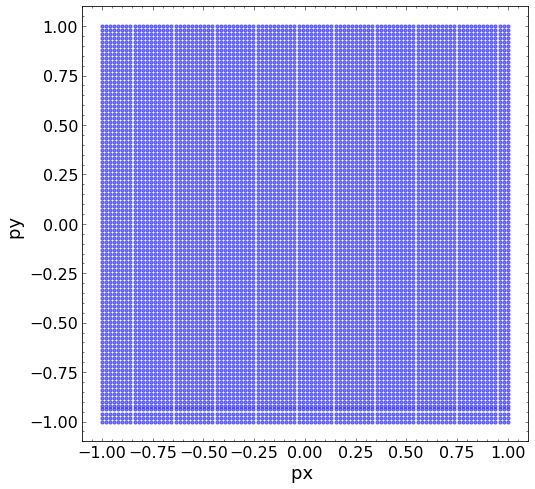

In [9]:
x_M1_list=[]
y_M1_list=[]
x_vM1_list=[]
y_vM1_list=[]
n_raytrace=len(M1_raytrace_list)
#n_vignetted=len(M1_vignetted_list)
for i in range (0,n_raytrace):
    x_M1=M1_raytrace_list[i][0]
    y_M1=M1_raytrace_list[i][1]
    x_M1_list.append(x_M1)
    y_M1_list.append(y_M1)
    
    
#for i in range (0,n_vignetted):    
    #x_vM1=M1_vignetted_list[i][0]
    #y_vM1=M1_vignetted_list[i][1]
    #x_vM1_list.append(x_vM1)
    #y_vM1_list.append(y_vM1)
    
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.scatter(x_M1_list/np.max(x_M1_list),y_M1_list/np.max(y_M1_list), marker='o', c='b', s=5*2,alpha=0.5)
#ax1.scatter(x_vM1_list/np.max(x_vM1_list),y_vM1_list/np.max(y_vM1_list), marker='o', c='r', s=5*2,alpha=0.5)
ax1.set_ylabel('py ', fontsize=18)
ax1.set_xlabel('px ', fontsize=18)

In [10]:
px=x_M1_list/np.max(x_M1_list)
py=y_M1_list/np.max(y_M1_list)
min(np.degrees(M1_ref_ang_list))

90.0

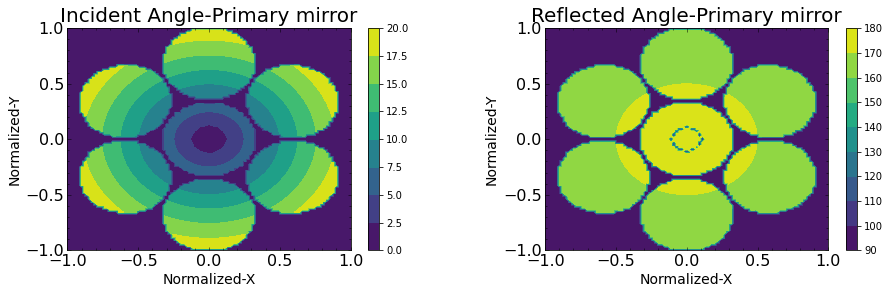

In [11]:
fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(221)
cs=ax1.tricontourf(px, py, np.degrees(M1_inc_ang_list),cmap='viridis',levels=8)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Incident Angle-Primary mirror',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cbar = plt.colorbar(cs) 

ax1 = fig.add_subplot(222)
cs=ax1.tricontourf(px,py,np.degrees(M1_ref_ang_list),cmap='viridis',levels=8)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Reflected Angle-Primary mirror',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cbar = plt.colorbar(cs) 
fig.subplots_adjust(hspace=0.35, wspace=0.35, top=0.85, right=0.95)

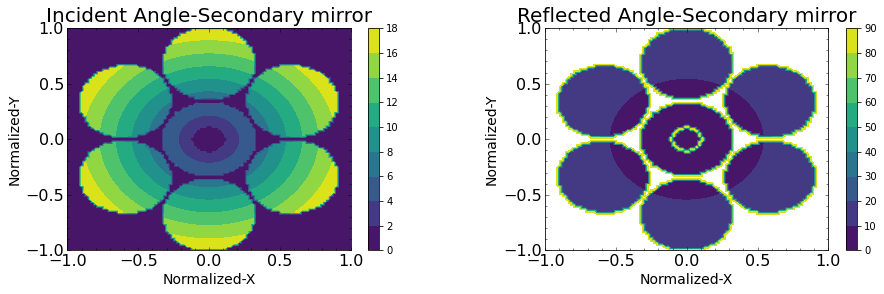

In [12]:
fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(221)
cs=ax1.tricontourf(px, py, np.degrees(M2_inc_ang_list),cmap='viridis',levels=8)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Incident Angle-Secondary mirror',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cbar = plt.colorbar(cs) 

ax1 = fig.add_subplot(222)
cs=ax1.tricontourf(px,py,np.degrees(M2_ref_ang_list),cmap='viridis',levels=8)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Reflected Angle-Secondary mirror',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cbar = plt.colorbar(cs) 
fig.subplots_adjust(hspace=0.35, wspace=0.35, top=0.85, right=0.95)

In [13]:
# reflection coefficients estimation
coating=pd.read_csv('D:\\Work\\OneDrive\\University_Arizona\\GMT_Polarization\\GMT_non-segmented\\coating_gmt.csv',header=0)
coating['n_metal']=coating['n']+1j*coating['k']
print(coating)
wav=input("Input the index corresponding to wavlength:")
nb=coating['n_metal'][int(wav)]
thb=0.04
thf=0
ni=1 # refractive index of air
rp_M1_list=[]
rs_M1_list=[]
rp_M2_list=[]
rs_M2_list=[]
rays=len(M1_raytrace_list)
for i in range (rays):
    
    ang_refr=np.arcsin((np.sin(M1_inc_ang_list[i])*ni)/nb)
    rp_M1=(ni*np.cos(M1_inc_ang_list[i])-nb*np.cos(ang_refr))/(ni*np.cos(M1_inc_ang_list[i])+nb*np.cos(ang_refr))
    rs_M1=(ni*np.cos(ang_refr)-nb*np.cos(M1_inc_ang_list[i]))/(ni*np.cos(ang_refr)+nb*np.cos(M1_inc_ang_list[i]))
    
    #ang_refr_M2=np.arcsin((np.sin(M2_inc_ang_list[i])*ni)/nb)
    #rp_M2=(ni*np.cos(M2_inc_ang_list[i])-nb*np.cos(ang_refr_M2))/(ni*np.cos(M2_inc_ang_list[i])+nb*np.cos(ang_refr_M2))
    #rs_M2=(ni*np.cos(ang_refr_M2)-nb*np.cos(M2_inc_ang_list[i]))/(ni*np.cos(ang_refr_M2)+nb*np.cos(M2_inc_ang_list[i]))
    
    rp_M1_list.append(rp_M1)
    rs_M1_list.append(rs_M1)
    #rp_M2_list.append(rp_M2)
    #rs_M2_list.append(rs_M2)

       Wav      n      k       n_metal
0   0.4000  0.490  -4.86  0.490-4.860j
1   0.4500  0.618  -5.47  0.618-5.470j
2   0.5000  0.769  -6.08  0.769-6.080j
3   0.5500  0.958  -6.69  0.958-6.690j
4   0.6000  1.200  -7.26  1.200-7.260j
5   0.6500  1.470  -7.79  1.470-7.790j
6   0.7000  1.830  -8.31  1.830-8.310j
7   0.7293  2.140  -8.57  2.140-8.570j
8   0.7500  2.400  -8.62  2.400-8.620j
9   0.7749  2.630  -8.60  2.630-8.600j
10  0.7999  2.800  -8.45  2.800-8.450j
11  0.8250  2.750  -8.31  2.750-8.310j
12  0.8266  2.740  -8.31  2.740-8.310j
13  0.8500  2.610  -8.22  2.610-8.220j
14  0.8551  2.580  -8.21  2.580-8.210j
15  0.8750  2.380  -8.18  2.380-8.180j
16  0.8856  2.240  -8.21  2.240-8.210j
17  0.9000  2.060  -8.30  2.060-8.300j
18  0.9184  1.860  -8.44  1.860-8.440j
19  0.9250  1.770  -8.49  1.770-8.490j
20  0.9500  1.490  -8.88  1.490-8.880j
21  1.0000  1.350  -9.58  1.350-9.580j
22  1.2000  1.210 -12.00   1.21-12.00j
23  2.0000  2.150 -20.70   2.15-20.70j
24  3.0000  4.240 -30.60 

KeyboardInterrupt: Interrupted by user

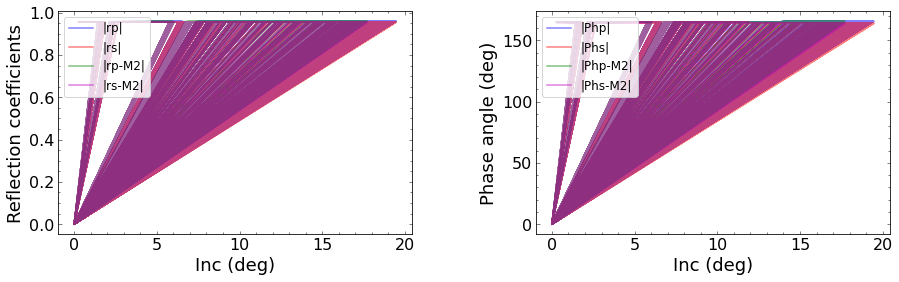

In [14]:
#plot of rp, rs, phi_p and phi_s
fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(121)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.plot(np.degrees(M1_inc_ang_list),np.abs(rp_M1_list),'b',alpha=0.5,label='|rp|')
ax1.plot(np.degrees(M1_inc_ang_list),np.abs(rs_M1_list),'r',alpha=0.5,label='|rs|')
ax1.plot(np.degrees(M2_inc_ang_list),np.abs(rp_M2_list),'g',alpha=0.5,label='|rp-M2|')
ax1.plot(np.degrees(M2_inc_ang_list),np.abs(rs_M2_list),'m',alpha=0.5,label='|rs-M2|')
ax1.set_xlabel('Inc (deg)', fontsize=18)
ax1.set_ylabel('Reflection coefficients', fontsize=18)
ax1.legend(loc='upper left',fontsize=12)
ax2 = fig.add_subplot(122)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax2.plot(np.degrees(M1_inc_ang_list),np.angle(rp_M1_list,deg=True),'b',alpha=0.5,label='|Php|')
ax2.plot(np.degrees(M1_inc_ang_list),np.angle(rs_M1_list,deg=True),'r',alpha=0.5,label='|Phs|')
ax2.plot(np.degrees(M2_inc_ang_list),np.angle(rp_M2_list,deg=True),'g',alpha=0.5,label='|Php-M2|')
ax2.plot(np.degrees(M2_inc_ang_list),np.angle(rs_M2_list,deg=True),'m',alpha=0.5,label='|Phs-M2|')
ax2.set_xlabel('Inc (deg)', fontsize=18)
ax2.set_ylabel('Phase angle (deg)', fontsize=18)
ax2.legend(loc='upper left',fontsize=12)
fig.subplots_adjust(hspace=0.35, wspace=0.35, top=0.9, right=0.95)

<ipython-input-15-2574af9e5e28>:1: RuntimeWarning: invalid value encountered in true_divide
  diat_M1=(np.abs(rp_M1_list)**2-np.abs(rs_M1_list)**2)/(np.abs(rp_M1_list)**2+np.abs(rs_M1_list)**2)
<ipython-input-15-2574af9e5e28>:3: RuntimeWarning: invalid value encountered in true_divide
  diat_M2=(np.abs(rp_M2_list)**2-np.abs(rs_M2_list)**2)/(np.abs(rp_M2_list)**2+np.abs(rs_M2_list)**2)


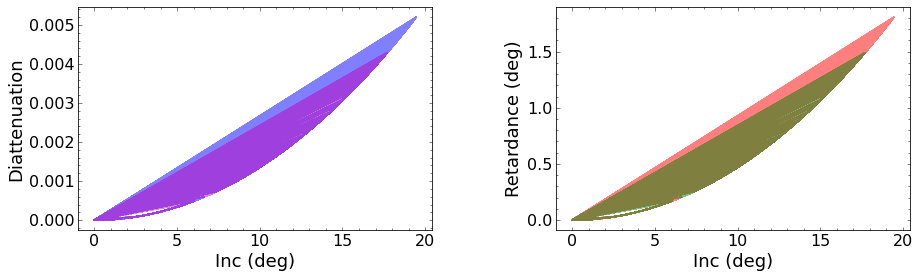

In [15]:
diat_M1=(np.abs(rp_M1_list)**2-np.abs(rs_M1_list)**2)/(np.abs(rp_M1_list)**2+np.abs(rs_M1_list)**2)
ret_M1=np.angle(rp_M1_list,deg=True)-np.angle(rs_M1_list,deg=True)
diat_M2=(np.abs(rp_M2_list)**2-np.abs(rs_M2_list)**2)/(np.abs(rp_M2_list)**2+np.abs(rs_M2_list)**2)
ret_M2=np.angle(rp_M2_list,deg=True)-np.angle(rs_M2_list,deg=True)

diat_M1[np.isnan(diat_M1)]=0
diat_M2[np.isnan(diat_M2)]=0
ret_M1[np.isnan(ret_M1)]=0
ret_M2[np.isnan(ret_M2)]=0


fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(121)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.plot(np.degrees(M1_inc_ang_list),diat_M1,'b',alpha=0.5,label='D')
ax1.plot(np.degrees(M2_inc_ang_list),diat_M2,'m',alpha=0.5,label='D')
ax1.set_xlabel('Inc (deg)', fontsize=18)
ax1.set_ylabel('Diattenuation', fontsize=18)

ax2 = fig.add_subplot(122)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax2.plot(np.degrees(M1_inc_ang_list),ret_M1,'r',alpha=0.5,label='Phi')
ax2.plot(np.degrees(M2_inc_ang_list),ret_M2,'g',alpha=0.5,label='Phi')
ax2.set_xlabel('Inc (deg)', fontsize=18)
ax2.set_ylabel('Retardance (deg)', fontsize=18)

fig.subplots_adjust(hspace=0.35, wspace=0.35, top=0.9, right=0.95)

# 


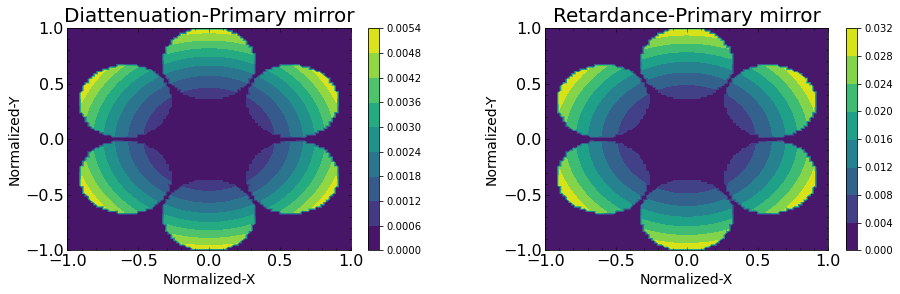

In [16]:
fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(221)
cs=ax1.tricontourf(px, py, diat_M1,cmap='viridis',levels=8)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Diattenuation-Primary mirror',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cbar = plt.colorbar(cs) 

ax1 = fig.add_subplot(222)
cs=ax1.tricontourf(px, py,np.radians(ret_M1),cmap='viridis',levels=8)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Retardance-Primary mirror',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cbar = plt.colorbar(cs) 
fig.subplots_adjust(hspace=0.35, wspace=0.35, top=0.85, right=0.95)

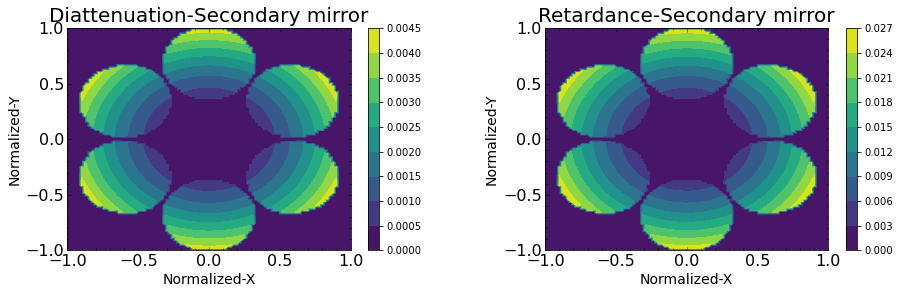

In [17]:
fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(221)
cs=ax1.tricontourf(px, py, diat_M2,cmap='viridis',levels=8)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Diattenuation-Secondary mirror',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cbar = plt.colorbar(cs) 

ax1 = fig.add_subplot(222)
cs=ax1.tricontourf(px, py,np.radians(ret_M2),cmap='viridis',levels=8)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Retardance-Secondary mirror',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cbar = plt.colorbar(cs) 
fig.subplots_adjust(hspace=0.35, wspace=0.35, top=0.85, right=0.95)

In [18]:
O_in_list=[]
O_out_list=[]
ref_mat_list=[]
q_array=[[1,0,0],[0,-1,0],[0,0,1]]
P_list=[]
Q_list=[]
Jones_pupil_pri_list=[]
for i in range (0,n_rays):
    o_in=[[M1_s_in_list[i][0], M1_p_in_list[i][0], M1_inc_dc_list[i][0]],
           [M1_s_in_list[i][1], M1_p_in_list[i][1], M1_inc_dc_list[i][1]],
           [M1_s_in_list[i][2], M1_p_in_list[i][2], M1_inc_dc_list[i][2]]]
    
    ref_matrix=[[rs_M1_list[i],0,0],[0,rp_M1_list[i],0],[0,0,1]]
    
    o_out=[[M1_s_in_list[i][0], M1_p_out_list[i][0], M1_ref_dc_list[i][0]],
           [M1_s_in_list[i][1], M1_p_out_list[i][1], M1_ref_dc_list[i][1]],
           [M1_s_in_list[i][2], M1_p_out_list[i][2], M1_ref_dc_list[i][2]]]
    
    o_in_inv=np.linalg.inv(o_in)
    P_out=np.matmul(o_out,np.matmul(ref_matrix,o_in_inv))
    Jones_pupil_pri=P_out
    
   

    
    
    O_in_list.append(o_in)
    ref_mat_list.append(ref_matrix)
    O_out_list.append(o_out)
    P_list.append(P_out)
    Jones_pupil_pri_list.append(Jones_pupil_pri)
    

In [19]:
Exx_list=[]
Exy_list=[]
Eyx_list=[]
Eyy_list=[]

for i in range (0,n_rays):
    Exx=Jones_pupil_pri_list[i][0][0]
    Exy=Jones_pupil_pri_list[i][0][1]
    Eyx=Jones_pupil_pri_list[i][1][0]
    Eyy=Jones_pupil_pri_list[i][1][1]
    
    Exx_list.append(Exx)
    Exy_list.append(Exy)
    Eyx_list.append(Eyx)
    Eyy_list.append(Eyy)
    

In [20]:
Exx_array = np.array(Exx_list)
Exx_array[np.isnan(Exx_array)]=0
Exy_array = np.array(Exy_list)
Exy_array[np.isnan(Exy_array)]=0
Eyx_array = np.array(Eyx_list)
Eyx_array[np.isnan(Eyx_array)]=0
Eyy_array = np.array(Eyy_list)
Eyy_array[np.isnan(Eyy_array)]=0

Exx_array=np.reshape(Exx_list,(100,100))
Exy_array=np.reshape(Exy_list,(100,100))
Eyx_array=np.reshape(Eyx_list,(100,100))
Eyy_array=np.reshape(Eyy_list,(100,100))


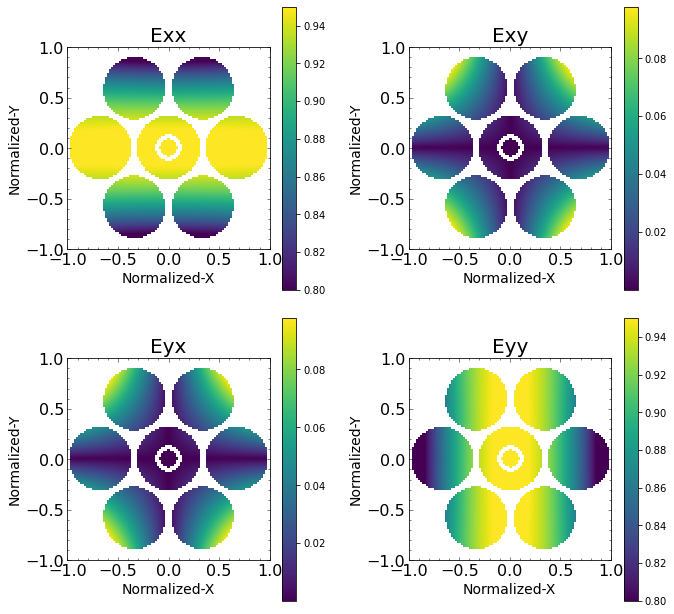

In [21]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
im1=ax1.imshow(np.abs(Exx_array),cmap='viridis',vmin=0.8,vmax=0.95,extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Exx',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(222)
im1=ax1.imshow(np.abs(Exy_array),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Exy',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(223)
im1=ax1.imshow(np.abs(Eyx_array),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Eyx',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(224)
im1=ax1.imshow(np.abs(Eyy_array),cmap='viridis',vmin=0.8,vmax=0.95,extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Eyy',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')
fig.subplots_adjust(hspace=0.1, wspace=0.35, top=0.95, right=0.95)

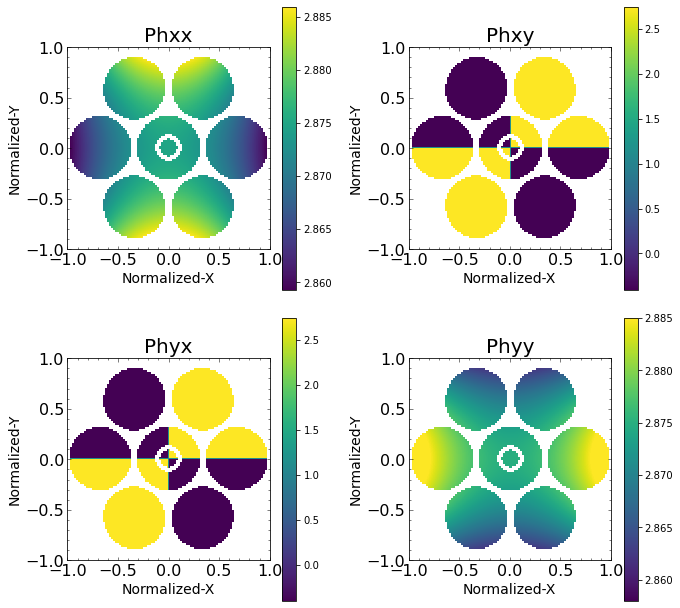

In [22]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
im1=ax1.imshow(np.angle(Exx_array),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Phxx',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(222)
im1=ax1.imshow(np.angle(Exy_array),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Phxy',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(223)
im1=ax1.imshow(np.angle(Eyx_array),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Phyx',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(224)
im1=ax1.imshow(np.angle(Eyy_array),cmap='viridis',vmin=2.858,vmax=2.885,extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Phyy',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')
fig.subplots_adjust(hspace=0.1, wspace=0.35, top=0.95, right=0.95)

In [23]:
O_in_list=[]
O_out_list=[]
ref_mat_list=[]
q_array=[[1,0,0],[0,-1,0],[0,0,1]]
P_list=[]
Q_list=[]
Jones_pupil_sec_list=[]
for i in range (0,n_rays):
    o_in=[[M2_s_in_list[i][0], M2_p_in_list[i][0], M2_inc_dc_list[i][0]],
           [M2_s_in_list[i][1], M2_p_in_list[i][1], M2_inc_dc_list[i][1]],
           [M2_s_in_list[i][2], M2_p_in_list[i][2], M2_inc_dc_list[i][2]]]
    
    ref_matrix=[[rs_M2_list[i],0,0],[0,rp_M2_list[i],0],[0,0,1]]
    
    o_out=[[M2_s_in_list[i][0], M2_p_out_list[i][0], M2_ref_dc_list[i][0]],
           [M2_s_in_list[i][1], M2_p_out_list[i][1], M2_ref_dc_list[i][1]],
           [M2_s_in_list[i][2], M2_p_out_list[i][2], M2_ref_dc_list[i][2]]]
    
    o_in_inv=np.linalg.inv(o_in)
    P_out=np.matmul(o_out,np.matmul(ref_matrix,o_in_inv))
    Jones_pupil_sec=np.matmul(P_out,Jones_pupil_pri_list[i])
    
    
    Jones_pupil_sec_list.append(Jones_pupil_sec)

In [24]:
Exx_list2=[]
Exy_list2=[]
Eyx_list2=[]
Eyy_list2=[]

for i in range (0,n_rays):
    Exx2=Jones_pupil_sec_list[i][0][0]
    Exy2=Jones_pupil_sec_list[i][0][1]
    Eyx2=Jones_pupil_sec_list[i][1][0]
    Eyy2=Jones_pupil_sec_list[i][1][1]
    
    Exx_list2.append(Exx2)
    Exy_list2.append(Exy2)
    Eyx_list2.append(Eyx2)
    Eyy_list2.append(Eyy2)

In [25]:
Exx_array2 = np.array(Exx_list2)
Exx_array2[np.isnan(Exx_array2)]=0
Exx_array2

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [26]:
Exx_array2 = np.array(Exx_list2)
Exx_array2[np.isnan(Exx_array2)]=0
Exy_array2 = np.array(Exy_list2)
Exy_array2[np.isnan(Exy_array2)]=0
Eyx_array2 = np.array(Eyx_list2)
Eyx_array2[np.isnan(Eyx_array2)]=0
Eyy_array2 = np.array(Eyy_list2)
Eyy_array2[np.isnan(Eyy_array2)]=0

Exx_array2=np.reshape(Exx_array2,(100,100))
Exy_array2=np.reshape(Exy_array2,(100,100))
Eyx_array2=np.reshape(Eyx_array2,(100,100))
Eyy_array2=np.reshape(Eyy_array2,(100,100))

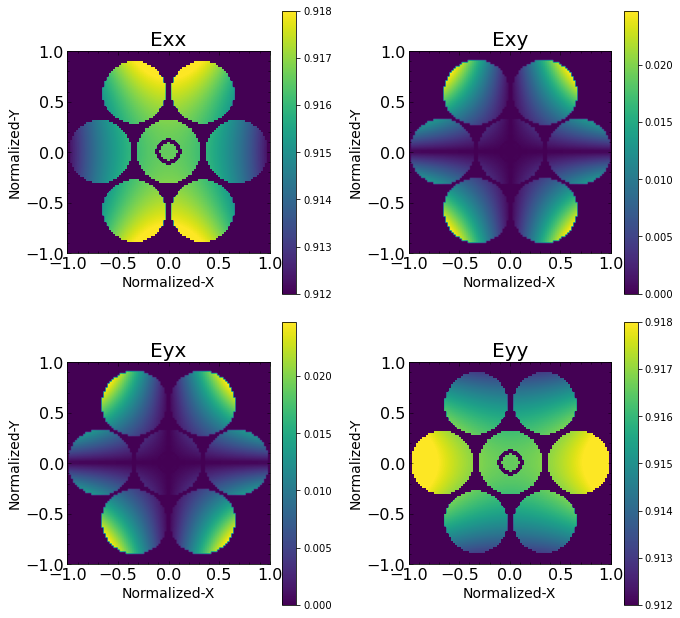

In [27]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
im1=ax1.imshow(np.abs(Exx_array2),cmap='viridis',vmin=0.912,vmax=0.918,extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Exx',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(222)
im1=ax1.imshow(np.abs(Exy_array2),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Exy',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(223)
im1=ax1.imshow(np.abs(Eyx_array2),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Eyx',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(224)
im1=ax1.imshow(np.abs(Eyy_array2),cmap='viridis',vmin=0.912,vmax=0.918,extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Eyy',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')
fig.subplots_adjust(hspace=0.1, wspace=0.35, top=0.95, right=0.95)
#fig.savefig('D:\\Work\\OneDrive\\University_Arizona\\GMT_Polarization\\GMT_segmented\\Polarization_aberrations\\Jones_amp_segmented.eps', format='eps', bbox_inches='tight')

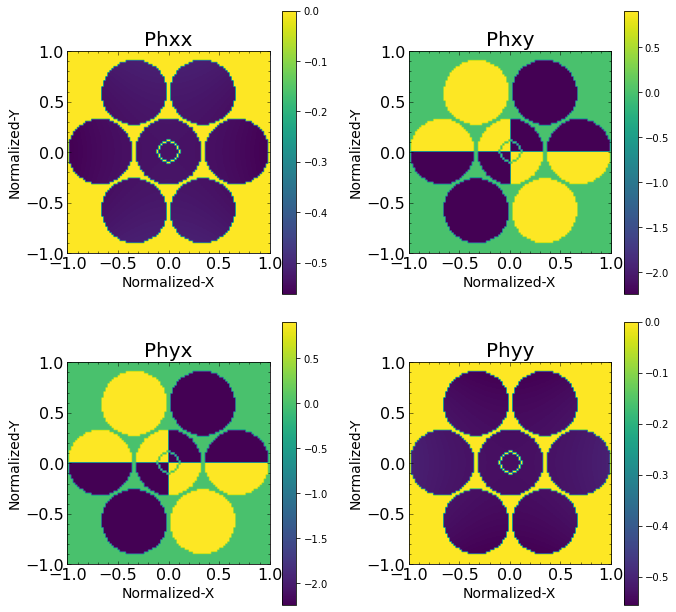

In [28]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
im1=ax1.imshow(np.angle(Exx_array2),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Phxx',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(222)
im1=ax1.imshow(np.angle(Exy_array2),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Phxy',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(223)
im1=ax1.imshow(np.angle(Eyx_array2),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Phyx',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(224)
im1=ax1.imshow(np.angle(Eyy_array2),cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Phyy',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')
fig.subplots_adjust(hspace=0.1, wspace=0.35, top=0.95, right=0.95)
#fig.savefig('D:\\Work\\OneDrive\\University_Arizona\\GMT_Polarization\\GMT_segmented\\Polarization_aberrations\\Jones_phase_segmented.eps', format='eps', bbox_inches='tight')

In [ ]:
np.reshape(Armxx,(1,10000))

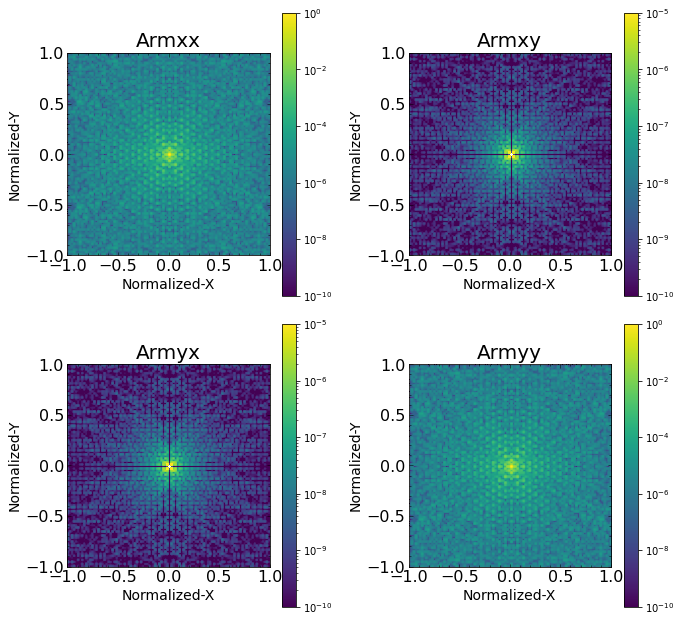

In [29]:
#FFT of the Jones pupil
Armxx1=(np.abs(np.fft.fftshift(np.fft.fft2(Exx_array2))))**2
Armxx=Armxx1/np.max(Armxx1)
Armxy=(np.abs(np.fft.fftshift(np.fft.fft2(Exy_array2))))**2
Armxy=Armxy/np.max(Armxx1)
Armyx=(np.abs(np.fft.fftshift(np.fft.fft2(Eyx_array2))))**2
Armyx=Armyx/np.max(Armxx1)
Armyy=(np.abs(np.fft.fftshift(np.fft.fft2(Eyy_array2))))**2
Armyy=Armyy/np.max(Armxx1)

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
im1=ax1.imshow(Armxx,cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)],norm=LogNorm(vmin=1e-10,vmax=1e0))
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Armxx',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(222)
im1=ax1.imshow(Armxy,cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)],norm=LogNorm(vmin=1e-10,vmax=1e-5))
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Armxy',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(223)
im1=ax1.imshow(Armyx,cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)],norm=LogNorm(vmin=1e-10,vmax=1e-5))
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Armyx',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')

ax1 = fig.add_subplot(224)
im1=ax1.imshow(Armyy,cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)],norm=LogNorm(vmin=1e-10,vmax=1e0))
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.set_ylabel('Normalized-Y', fontsize=14)
ax1.set_xlabel('Normalized-X', fontsize=14)
ax1.set_title('Armyy',fontdict={'fontsize': 20, 'fontweight': 'medium'})
cb = fig.colorbar(im1,orientation='vertical')
fig.subplots_adjust(hspace=0.1, wspace=0.35, top=0.95, right=0.95)
fig.savefig('D:\\Work\\OneDrive\\University_Arizona\\GMT_Polarization\\GMT_segmented\\Polarization_aberrations\\ARM_GMT.eps', format='eps', bbox_inches='tight')

In [30]:
Armxx=np.fft.fftshift(np.fft.fft2(Exx_array2))
Armxy=np.fft.fftshift(np.fft.fft2(Exy_array2))
Armyx=np.fft.fftshift(np.fft.fft2(Eyx_array2))
Armyy=np.fft.fftshift(np.fft.fft2(Eyy_array2))

In [31]:
M11=0.5*(Armxx*np.conj(Armxx)+Armxy*np.conj(Armxy)+Armyx*np.conj(Armyx)+Armyy*np.conj(Armyy))
M12=0.5*(Armxx*np.conj(Armxx)-Armxy*np.conj(Armxy)+Armyx*np.conj(Armyx)-Armyy*np.conj(Armyy))
M13=np.real(Armxx*np.conj(Armxy)+Armyx*np.conj(Armyy))
M14=np.imag(-Armxx*np.conj(Armxy)-Armyx*np.conj(Armyy))
M21=0.5*(Armxx*np.conj(Armxx)-Armxy*np.conj(Armxy)+Armyx*np.conj(Armyx)-Armyy*np.conj(Armyy))
M22=0.5*(Armxx*np.conj(Armxx)-Armxy*np.conj(Armxy)-Armyx*np.conj(Armyx)+Armyy*np.conj(Armyy))
M23=np.real(Armxx*np.conj(Armxy)-Armyx*np.conj(Armyy))
M24=np.imag(-Armxx*np.conj(Armxy)+Armyx*np.conj(Armyy))
M31=np.real(Armxx*np.conj(Armyx)+Armxy*np.conj(Armyy))
M32=np.real(Armxx*np.conj(Armyx)-Armxy*np.conj(Armyy))
M33=np.real(Armxx*np.conj(Armyy)+Armxy*np.conj(Armyx))
M34=np.imag(-Armxx*np.conj(Armyy)+Armxy*np.conj(Armyx))
M41=np.imag(Armxx*np.conj(Armyx)+Armxy*np.conj(Armyy))
M42=np.imag(Armxx*np.conj(Armyx)-Armxy*np.conj(Armyy))
M43=np.imag(Armxx*np.conj(Armyy)+Armxy*np.conj(Armyx))
M44=np.real(Armxx*np.conj(Armyy)-Armxy*np.conj(Armyx))

In [32]:
M11_nor=abs(M11)/np.max(abs(M11))
M12=abs(M12)/np.max(abs(M11))
M13=abs(M13)/np.max(abs(M11))
M14=abs(M14)/np.max(abs(M11))
M21=abs(M21)/np.max(abs(M11))
M22=abs(M22)/np.max(abs(M11))
M23=abs(M23)/np.max(abs(M11))
M24=abs(M24)/np.max(abs(M11))
M31=abs(M31)/np.max(abs(M11))
M32=abs(M32)/np.max(abs(M11))
M33=abs(M33)/np.max(abs(M11))
M34=abs(M34)/np.max(abs(M11))
M41=abs(M41)/np.max(abs(M11))
M42=abs(M42)/np.max(abs(M11))
M43=abs(M43)/np.max(abs(M11))
M44=abs(M44)/np.max(abs(M11))

In [33]:
Mueller_mat=((M11_nor,M12,M13,M14),(M21,M22,M23,M24),(M31,M32,M33,M34),(M41,M42,M43,M44))

In [ ]:
np.max(M31)

In [ ]:
Mueller_mat[1][0]

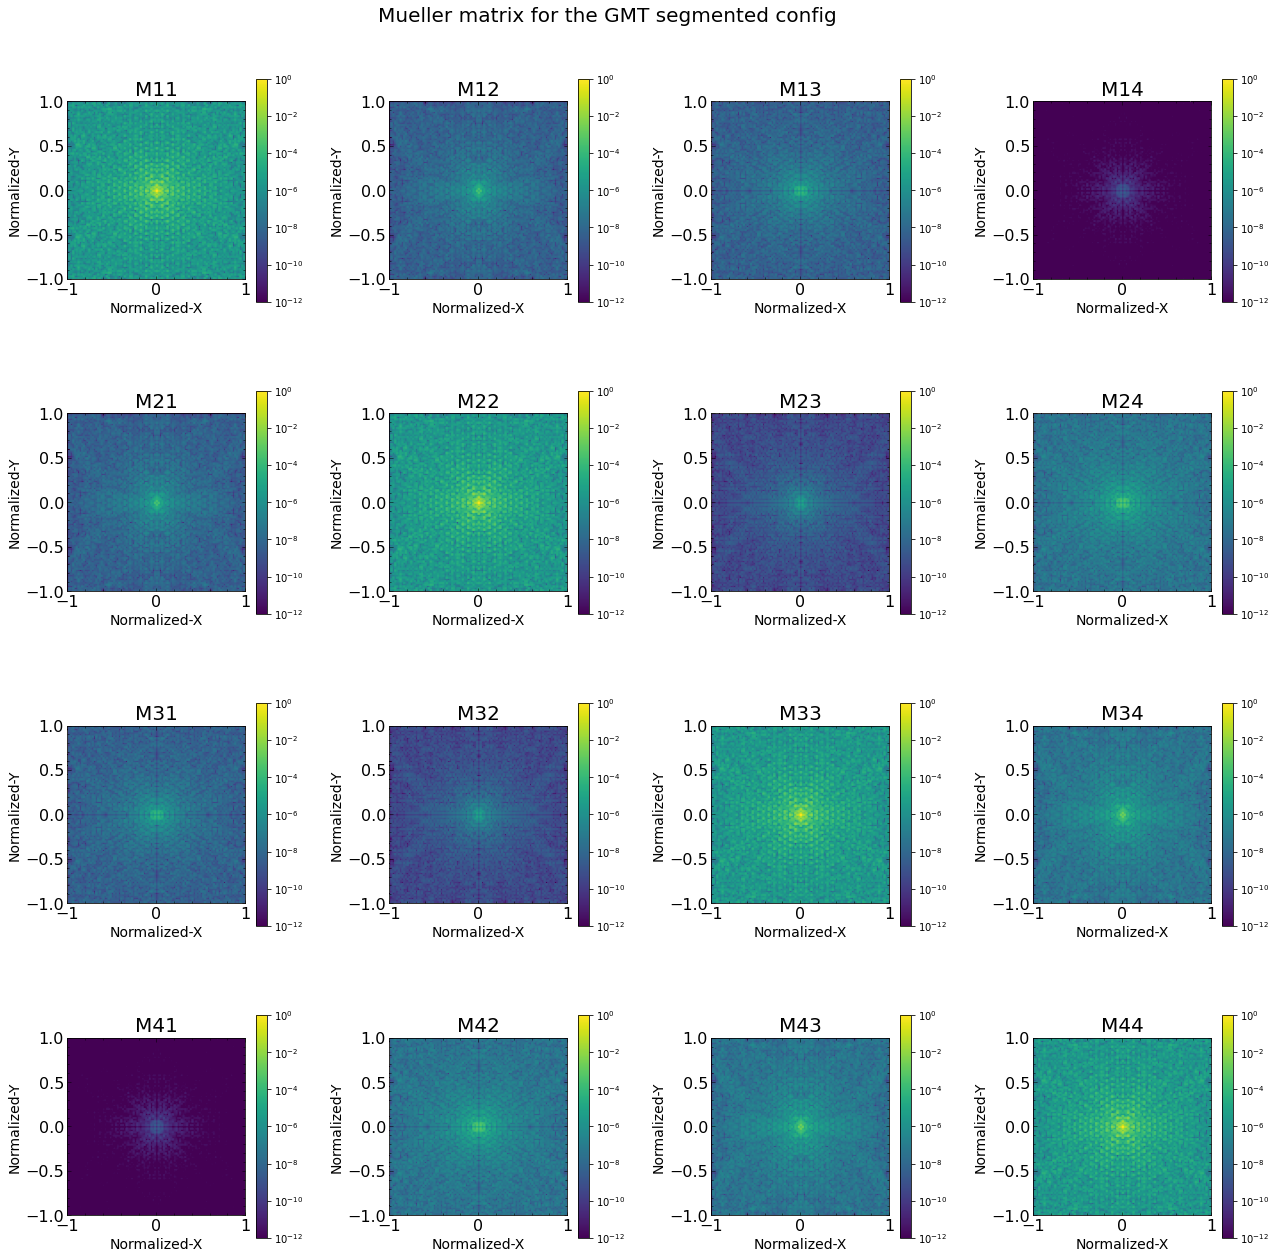

In [34]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 20))
plots = []

for i in range(4):
    for j in range(4):
        ax = plt.subplot2grid((4,4), (i,j))
        im1=ax.imshow(Mueller_mat[i][j],cmap='viridis',extent=[np.min(px),np.max(px),np.min(py),np.max(py)],norm=LogNorm(vmin=1e-12,vmax=1e0))
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.minorticks_on()
        ax.tick_params(which='both', direction='in', width=0.5, labelsize=16)
        ax.set_ylabel('Normalized-Y', fontsize=14)
        ax.set_xlabel('Normalized-X', fontsize=14)
        ax.set_title('M'+str(i+1)+str(j+1),fontdict={'fontsize': 20, 'fontweight': 'medium'})
        cb = fig.colorbar(im1,orientation='vertical')
        fig.subplots_adjust(hspace=0.4, wspace=0.45, top=0.93, right=0.95)
        fig.suptitle("Mueller matrix for the GMT segmented config", fontsize=20) 
plt.show()
fig.savefig('D:\\Work\\OneDrive\\University_Arizona\\GMT_Polarization\\GMT_segmented\\Polarization_aberrations\\PSM_GMT.eps', format='eps', bbox_inches='tight')

In [ ]:
#unpolarized star
